## HAND WRITTEN RECOGNIZATION

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_test)

(60000, 10000)

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train[0].shape

(28, 28)

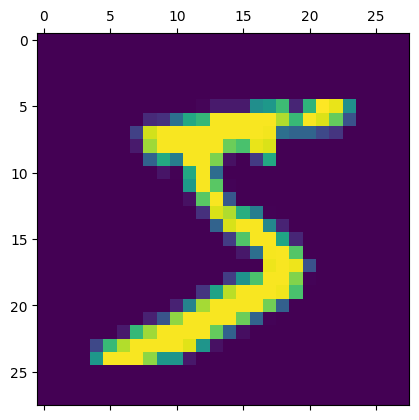

In [6]:
plt.matshow(X_train[0])

In [7]:
##SCALING

X_train=X_train/255
X_test=X_test/255



In [8]:
model= keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
    
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
X_test_flatten=X_test.reshape(len(X_test),28*28)
X_train_flatten=X_train.reshape(len(X_train),28*28)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.2723 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1244 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0861 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0507 - accuracy: 0.9847


In [11]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9775


[0.07281234860420227, 0.9775000214576721]

In [12]:
y_predicted=model.predict(X_test_flatten)

313/313 [==============================] - 1s 4ms/step


In [13]:
import numpy as np
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


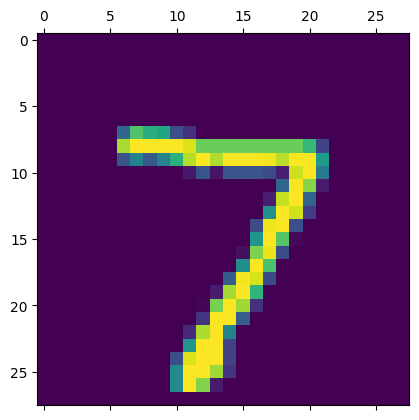

In [14]:
plt.matshow(X_test[0])

In [16]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    3,    1,    1,    2,    1,    1,    1,    0],
       [   0, 1127,    2,    1,    0,    1,    3,    0,    1,    0],
       [   2,    0, 1018,    1,    3,    0,    2,    3,    3,    0],
       [   0,    0,    3,  983,    1,   13,    2,    4,    4,    0],
       [   0,    1,    5,    0,  964,    0,    4,    1,    3,    4],
       [   2,    0,    0,    6,    1,  876,    4,    1,    2,    0],
       [   5,    3,    3,    1,    6,    9,  930,    0,    1,    0],
       [   1,    6,   13,    0,    4,    0,    0,  995,    3,    6],
       [   1,    2,    3,    5,    4,    5,    2,    4,  946,    2],
       [   1,    3,    0,    4,   15,    5,    1,    4,    9,  967]])>

Text(220.72222222222223, 0.5, 'Truth')

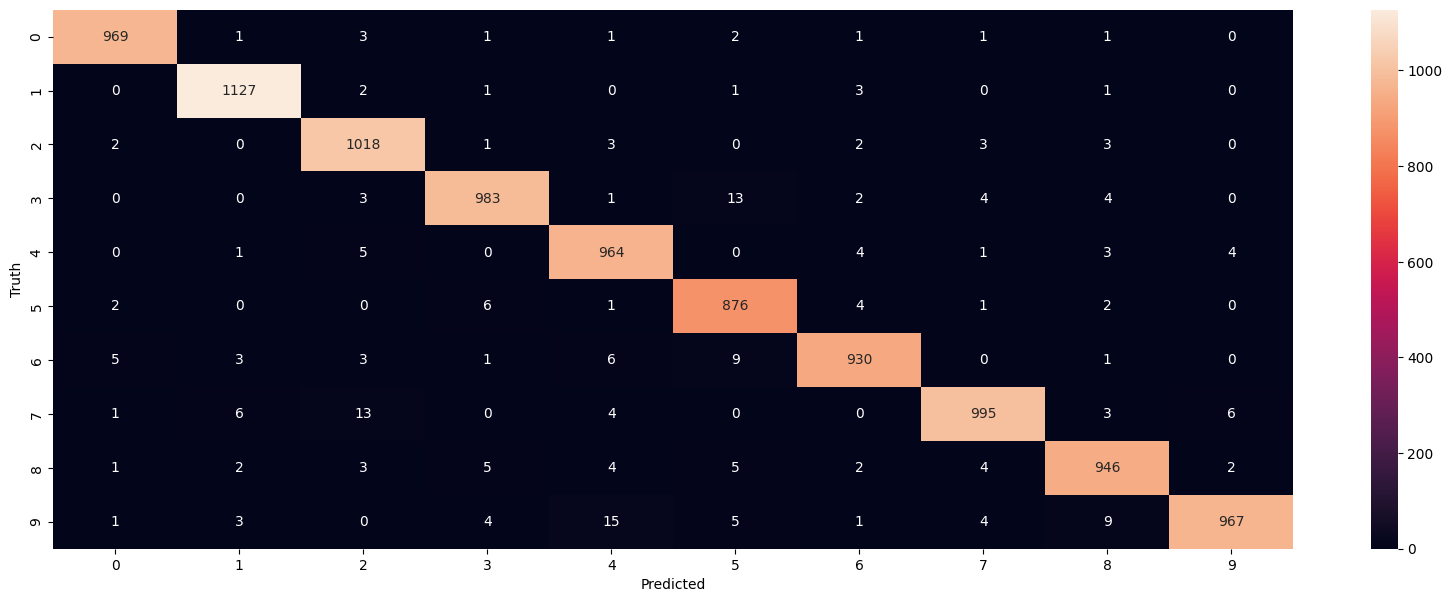

In [18]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')